# Качество вина

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (16,8)

### Задание 1
Загрузите [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) с информацией о характеристиках вина и его качестве.

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()
df.tail()
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Что из себя представляет объект в этом наборе данных? Сколько их?**

Объект (представлен объектом Series) - описание признаков (химического состава, вроде) вина. 
Пример объекта и количество объектов:

In [3]:
df.loc[0] # пример объекта из набора данных
df.shape[0] # количество объектов

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Name: 0, dtype: float64

1599

**Какие признаки описывают объекты? Сколько их?**

Признаки, описывающие объекты и их количество:

In [4]:
df.columns # признаки, описывающие объекты
df.shape[1] # количество признаков

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

12

**Какой признак является целевым?**
**Каковы их области значений?**

Надо полагать, что целевыми признаками являются `alcohol` и `quality`. Их области значений:

In [5]:
print("Для признака 'alcohol': минимальное значение {:.1f}, максимальное значение {:.1f}.".format(df['alcohol'].min(), df['alcohol'].max()))
print("Для признака 'quality': минимальное значение {:.1f}, максимальное значение {:.1f}.".format(df['quality'].min(), df['quality'].max()))

Для признака 'alcohol': минимальное значение 8.4, максимальное значение 14.9.
Для признака 'quality': минимальное значение 3.0, максимальное значение 8.0.


**Есть ли пропуски?**

Да, пропуски есть.

In [6]:
np.any(df['alcohol'].isnull())
np.any(df['quality'].isnull())

False

False

### Задание 2 (1 балл)
Создайте новый столбец `quality_cat`, которая будет иметь значение `1` если `quality > 5` и `0` - иначе.

In [7]:
df.loc[:, 'quality_cat'] = np.array(df['quality'] > 5, dtype=int)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  quality_cat  
0      9.4        5            0  
1      9.8        5            0  
2      9.8        5            0  
3      9.8        6            1  
4      9.4        5            0

### Задание 3 (1 балл)
С помощью метода `.hist()` нарисуйте гистрограммы признака `alcohol` в группах с `quality_cat == 1` и `quality_cat == 0`. Добавьте в `hist()` аргумент `alpha=0.3` для прозрачности.

Гистограммы разбиты на большое количество столбцов (*bins*) для большей точности отображения (при этом, однако, страдает наглядность).

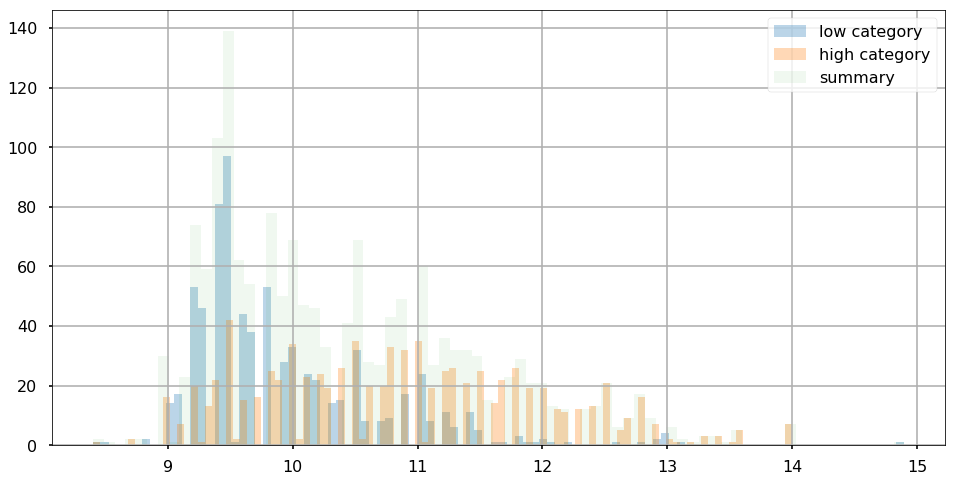

In [8]:
df[df['quality_cat'] == 0]['alcohol'].hist(alpha=0.3, label="low category", bins=100)#, bins=df[df['quality_cat'] == 0]['alcohol'].value_counts().shape[0])
df[df['quality_cat'] == 1]['alcohol'].hist(alpha=0.3, label="high category", bins=100)#, bins=df[df['quality_cat'] == 1]['alcohol'].value_counts().shape[0])
df['alcohol'].hist(alpha=0.07, label="summary", bins=75)#, bins=df['alcohol'].value_counts().shape[0]//2)
plt.legend();

### Задание 4 (2 балла)
Можете ли вы придумать правило для классификации вина на хорошее и плохое по рисунку выше? Пусть это будет нашей первой моделью)

Напишите функцию `theta = brute_clf_train(df)` которая бы перебирала пороговое значение $\theta$ по признаку `alcohol`, делало предсказание и выводило наилучшее $\theta$.

Т.е. если `alcohol` $\geq \theta$, то `prediction = 1` и `0` - иначе.


Оптимальность $\theta$ будем определять по доле совпадения значений `prediction` и `quality_cat` которое оно дает.

Попробуем разбить выборку на 2 предложенные категории опираясь на численность объектов.

Для каждой категории получим разницу численности объектов с различными признаками **"alcohol"**.

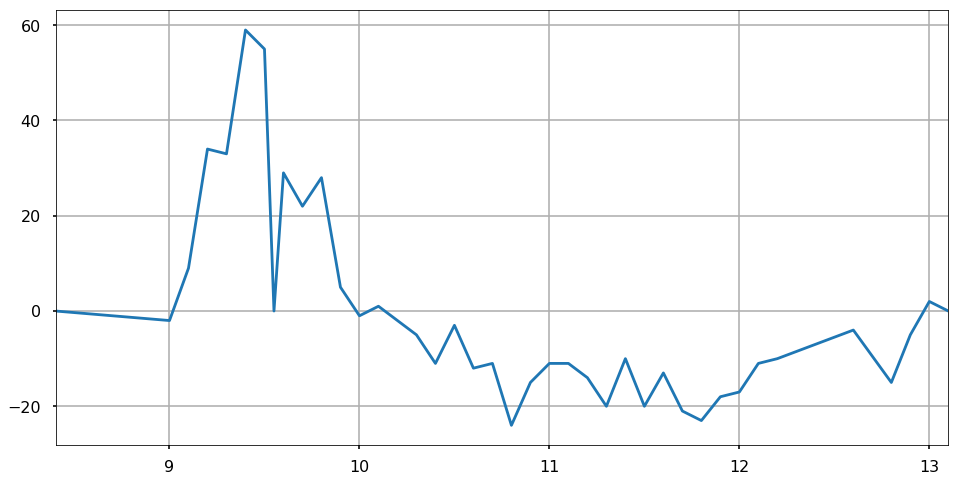

In [9]:
diffrence = df[df['quality_cat'] == 0]['alcohol'].value_counts() - df[df['quality_cat'] == 1]['alcohol'].value_counts()
diffrence = diffrence[diffrence.notnull()]
diffrence.plot(grid=True);

Исходя из полученного графика, можно предположить, что принадлежность к определенной категории определяется положением относительно оси Х: ниже - категория высокого качества, выше - низкого.

Попытка найти критерий разделения на 2 множества.

Граница множеств размыта, поэтому выбор различных оценок дает очень разные результаты.

In [10]:
diff = df[df['quality_cat'] == 0]['alcohol'].value_counts() - df[df['quality_cat'] == 1]['alcohol'].value_counts()
diff = diff[diff.notnull()]
G1 = diff < 0
G2 = diff > 0
stat = pd.DataFrame(columns=diff.values)
stat.loc['alcohol'] = diff.index
stat.loc['<=i, 1'] = [diff[diff.index<=i][G1].sum() for i in diff.index]
stat.loc['>i, 1'] = [diff[diff.index>i][G1].sum() for i in diff.index]
stat.loc['d1'] = stat.loc['<=i, 1'] - stat.loc['>i, 1']
stat.loc['<=i, 2'] = [diff[diff.index<=i][G2].sum() for i in diff.index]
stat.loc['>i, 2'] = [diff[diff.index>i][G2].sum() for i in diff.index]
stat.loc['d2'] = stat.loc['<=i, 2'] - stat.loc['>i, 2']
stat.loc['total'] = abs(stat.loc['d1'] - stat.loc['d2'])
stat.loc['A'] = abs(stat.loc['<=i, 1'] - stat.loc['>i, 2'])
stat.loc['B'] = abs(stat.loc['<=i, 2'] - stat.loc['>i, 1'])
stat.loc['diff'] = stat.loc['A'] - stat.loc['B']
stat.T.head()
print("{:20.20}:{:>10.10}".format("min total", stat.T[stat.T['total'] == min(stat.T['total'])]['alcohol'].values[0]))
stat_m = stat.T[abs(stat.columns) <= 2]
print("{:20.20}:{:>10.10}".format("min total (D <= 2)", stat_m[stat_m['total'] == min(stat_m['total'])]['alcohol'].values[0]))
print("{:20.20}:{:>10.10}".format("min diff", stat.T[stat.T['diff'] == min(stat.T['diff'])]['alcohol'].values[-1]))

alcohol  <=i, 1  >i, 1     d1  <=i, 2  >i, 2     d2  total      A  \
 0.0       8.4     0.0 -309.0  309.0     0.0  277.0 -277.0  586.0  277.0   
-2.0       9.0    -2.0 -307.0  305.0     0.0  277.0 -277.0  582.0  279.0   
 9.0       9.1    -2.0 -307.0  305.0     9.0  268.0 -259.0  564.0  270.0   
 34.0      9.2    -2.0 -307.0  305.0    43.0  234.0 -191.0  496.0  236.0   
 33.0      9.3    -2.0 -307.0  305.0    76.0  201.0 -125.0  430.0  203.0   

           B   diff  
 0.0   309.0  -32.0  
-2.0   307.0  -28.0  
 9.0   316.0  -46.0  
 34.0  350.0 -114.0  
 33.0  383.0 -180.0

min total           :      10.4
min total (D <= 2)  :      10.2
min diff            :      10.1


Предположительно (исходя из графика) наиболее релевантным результатом будет `min diff`.

In [11]:
def brute_clf_train(df):
    diff = df[df['quality_cat'] == 0]['alcohol'].value_counts() - df[df['quality_cat'] == 1]['alcohol'].value_counts()
    diff = diff[diff.notnull()]
    G1 = diff < 0
    G2 = diff > 0
    stat = pd.DataFrame(columns=diff.values)
    stat.loc['alcohol'] = diff.index
    stat.loc['d1'] = [diff[diff.index<=i][G1].sum() - diff[diff.index>i][G1].sum() for i in diff.index]
    stat.loc['d2'] = [diff[diff.index<=i][G2].sum() - diff[diff.index>i][G2].sum() for i in diff.index]
    stat.loc['total'] = abs(stat.loc['d1'] - stat.loc['d2'])
    stat.loc['A'] = [diff[diff.index<=i][G1].sum() - diff[diff.index>i][G2].sum() for i in diff.index]
    stat.loc['B'] = [diff[diff.index<=i][G2].sum() - diff[diff.index>i][G1].sum() for i in diff.index]
    stat.loc['diff'] = stat.loc['A'].abs() - stat.loc['B'].abs()
    stat_m = stat.T[abs(stat.columns) <= 2]
    res = []
    res.append(stat.T[stat.T['total'] == min(stat.T['total'])]['alcohol'].values[0])
    res.append(stat_m[stat_m['total'] == min(stat_m['total'])]['alcohol'].values[0])
    res.append(stat.T[stat.T['diff'] == min(stat.T['diff'])]['alcohol'].values[0])
#     return res[-1]
    return res

Оценим качество полученных коэффициентов $\theta$.

In [12]:
def theta_error_measure(t_list, df):
    for t in t_list:
        print("Error for theta = {:.3}: {:>20.5}".format(t, abs(df['quality_cat'] - np.array(df['alcohol'] > t, dtype=int)).sum()/df.shape[0]))
    all_possible_errors = [abs(df['quality_cat'] - np.array(df['alcohol'] > t, dtype=int)).sum()/df.shape[0] for t in sorted(df['alcohol'].unique())]
    print("Min possible error (theta = {t:.3}): {:>10.5}".format(min(all_possible_errors), t=sorted(df['alcohol'].unique())[all_possible_errors.index(min(all_possible_errors))]))

Полученная $\theta$ близка к идеальной (с минимальной ошибкой).

In [13]:
theta = brute_clf_train(df)
theta_error_measure(theta, df)

Error for theta = 10.4:              0.30769
Error for theta = 10.2:              0.29769
Error for theta = 9.9:              0.29581
Min possible error (theta = 9.95):    0.29518


*Ниже проверил полученные результаты с помощью метода ближайших соседей. Не знаю, насколько успешно.*

C:\Users\d_pch\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\d_pch\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


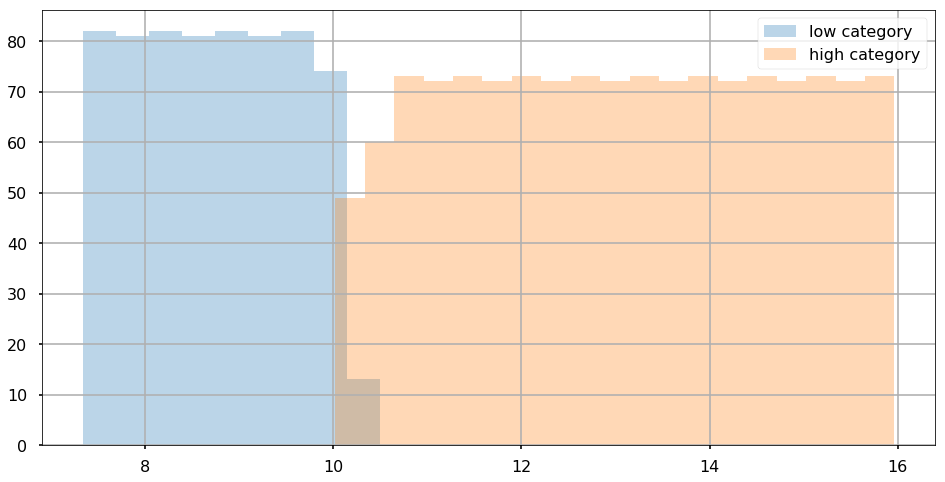

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50, weights='uniform', metric='euclidean')
knn.fit(df['alcohol'][~df['alcohol'].isnull()].reshape(-1, 1), df['quality_cat'][~df['alcohol'].isnull()].reshape(-1, 1)) # обучение

# Получим все возможные точки на плоскости:
all_range = np.linspace(df['alcohol'].min()-df['alcohol'].std(), df['alcohol'].max()+df['alcohol'].std(), 2000).reshape(-1, 1)

# получаем предсказания по всем точкам: 
all_hat = knn.predict(all_range)

res = pd.DataFrame(np.c_[all_range, all_hat.reshape(-1,1)], columns=['alcohol', 'quality_cat']) 
# res.head()
res[res['quality_cat'] == 0]['alcohol'].hist(alpha=0.3, label="low category", bins=res[res['quality_cat'] == 0]['alcohol'].value_counts().shape[0]//70)
res[res['quality_cat'] == 1]['alcohol'].hist(alpha=0.3, label="high category", bins=res[res['quality_cat'] == 1]['alcohol'].value_counts().shape[0]//70);
plt.legend();

### Задание 5 (4 балла)

Напишите функцию `prediction = brute_clf_predict(df, theta)` которая бы по значению признака `alcohol` и найденному выше $\theta$ говорила какое качество у вина.

<!-- А заодно выводила бы количество "ошибок" на текущем наборе данных -->

Оценим, как распределены группы вин по качеству внутри категорий. *Сделано с циклом для того, чтобы окрасить в заданные цвета*.

In [15]:
for i in sorted(df['quality'].unique()):
    if i <= 5:
        col = "#FF{}F00".format(3*(i-3))
#         df[df['quality'] == i]['alcohol'].hist(alpha=0.3, label="quality {}".format(i), color=col)
    else:
        col = "#00{}FFF".format(3*(i-6))
#         df[df['quality'] == i]['alcohol'].hist(alpha=0.3, label="quality {}".format(i), color=col)
    df[df['quality'] == i]['alcohol'].hist(alpha=0.3, label="quality {}".format(i), color=col)
plt.legend();

~~Из полученной гистограммы видно, что качество вин *(quality)* внутри категрий *(quality_cat)* определить не получится...~~

Внутри категории низкого качества вино качества 5 перекрывает остальные. То же верно для вина качества 6 в категории высокого качества.

**Как определить качество вина (`quality`) зная признак `alcohol` и $\theta$?** *(возможно, я не понял задание)*.

In [16]:
def brute_clf_predict(df, theta):
    pass

In [17]:
prediction = brute_clf_predict(df, theta)

## Другой набор данных
Проверим, как обобщается наша модель на другие данные.

* Загрузите другой [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)
* Выполните те же панипуляции с признаком `quality`
* Используйте нашу простейшую модель для предсказания качества на новых данных и сравните результаты

In [18]:
DF = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
# DF.head()
# DF.tail()
# DF.describe()
DF.loc[:, 'quality_cat'] = np.array(DF['quality'] > 5, dtype=int)
DF.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  quality_cat  
0      8.8        6            1  
1      9.5        6            1  
2     10.1        6            1  
3      9.9        6            1  
4      9.9        6            1

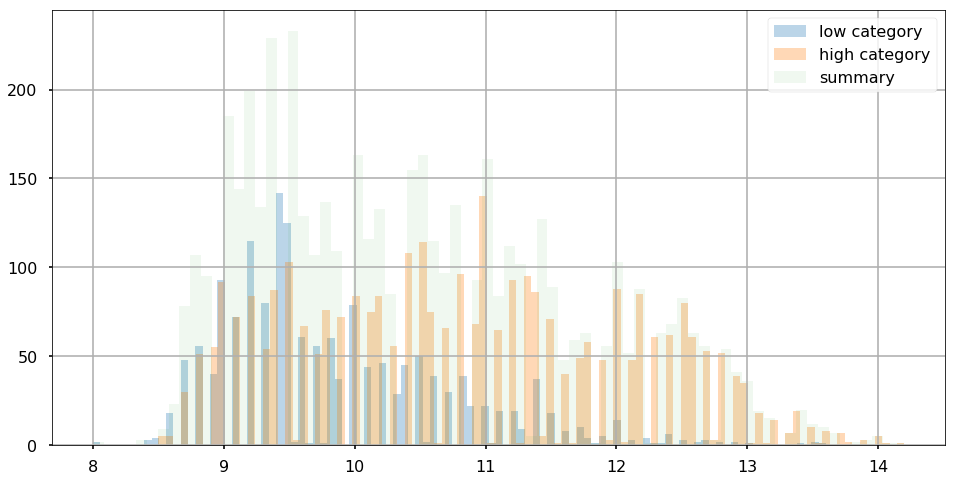

In [19]:
DF[DF['quality_cat'] == 0]['alcohol'].hist(alpha=0.3, label="low category", bins=100)
DF[DF['quality_cat'] == 1]['alcohol'].hist(alpha=0.3, label="high category", bins=100)
DF['alcohol'].hist(alpha=0.07, label="summary", bins=75)
plt.legend();

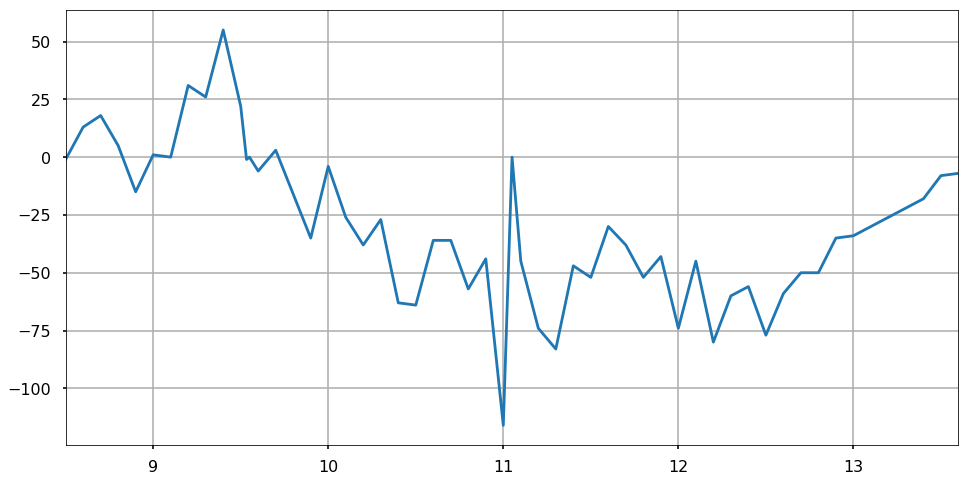

In [20]:
Diffrence = DF[DF['quality_cat'] == 0]['alcohol'].value_counts() - DF[DF['quality_cat'] == 1]['alcohol'].value_counts()
Diffrence = Diffrence[Diffrence.notnull()]
Diffrence.plot(grid=True);

In [21]:
theta = brute_clf_train(DF)
theta_error_measure(theta, DF)

Error for theta = 11.3:              0.46039
Error for theta = 11.1:              0.41874
Error for theta = 9.5:              0.30216
Min possible error (theta = 9.5):    0.30216


При проверке работы функции поиска коэффициента $\theta$ на новом наборе данных снова получен результат, близкий к наиболее релевантному. 

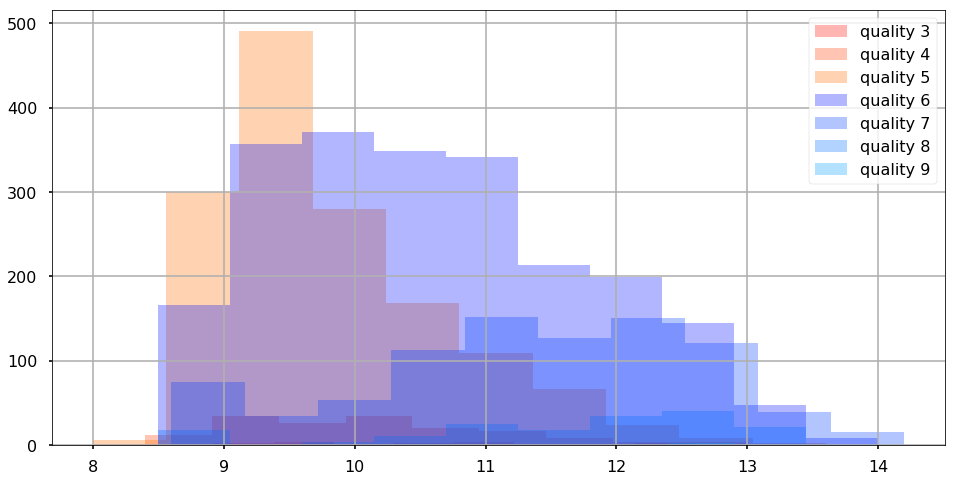

In [22]:
for i in sorted(DF['quality'].unique()):
    if i <= 5:
        col = "#FF{}F00".format(3*(i-3))
    else:
        col = "#00{}FFF".format(3*(i-6))
    DF[DF['quality'] == i]['alcohol'].hist(alpha=0.3, label="quality {}".format(i), color=col)
plt.legend();